# Setting up

In [1]:
import warnings
warnings.filterwarnings('ignore')

!wget https://www.dropbox.com/s/79yyzeb0wqh8kf1/Data-CNN.zip

--2023-06-28 11:38:33--  https://www.dropbox.com/s/79yyzeb0wqh8kf1/Data-CNN.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/79yyzeb0wqh8kf1/Data-CNN.zip [following]
--2023-06-28 11:38:33--  https://www.dropbox.com/s/raw/79yyzeb0wqh8kf1/Data-CNN.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4f8ce7c1cc6e8b3f9b40b619d7.dl.dropboxusercontent.com/cd/0/inline/B-3jSQEJYo9iD1Tr6gwslzaa835h_m4wt0k0eEK20ijDIgHIW4z408_Y6OtcPJMJ5cBS3-Rxf2TF7w39P2lJTrqu3Ugoj4Jui813K3HpLiOvXoyK_Yh2TjcrO6Bw_8UytnC6E6vjCBG3A9OozT1PAnEz-solKbsafJlXYVrVmnzZUA/file# [following]
--2023-06-28 11:38:34--  https://uc4f8ce7c1cc6e8b3f9b40b619d7.dl.dropboxusercontent.com/cd/0/inline/B-3jSQEJYo9iD1Tr6gwslzaa835h_m4wt0k0eEK20ijDIgHIW4z408_Y6OtcPJMJ5cBS3-Rxf2TF7w39

In [2]:
!unzip Data-CNN.zip

Archive:  Data-CNN.zip
   creating: crops_and_grass/
   creating: crops_and_grass/cassava/
  inflating: crops_and_grass/cassava/cassava (1).jpg  
  inflating: crops_and_grass/cassava/cassava (10).jpg  
  inflating: crops_and_grass/cassava/cassava (100).jpg  
  inflating: crops_and_grass/cassava/cassava (101).jpg  
  inflating: crops_and_grass/cassava/cassava (102).jpg  
  inflating: crops_and_grass/cassava/cassava (103).jpg  
  inflating: crops_and_grass/cassava/cassava (104).jpg  
  inflating: crops_and_grass/cassava/cassava (105).jpg  
  inflating: crops_and_grass/cassava/cassava (11).jpg  
  inflating: crops_and_grass/cassava/cassava (111).jpg  
  inflating: crops_and_grass/cassava/cassava (112).jpg  
  inflating: crops_and_grass/cassava/cassava (113).jpg  
  inflating: crops_and_grass/cassava/cassava (114).jpg  
  inflating: crops_and_grass/cassava/cassava (115).jpg  
  inflating: crops_and_grass/cassava/cassava (116).jpg  
  inflating: crops_and_grass/cassava/cassava (117).jpg  
 

## process dataset

In [3]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [4]:
try:
  os.makedirs("./data/train/cassava")
  os.makedirs("./data/train/grass")
  os.makedirs("./data/train/maize")
  os.makedirs("./data/train/sugarcane")

  os.makedirs("./data/val/cassava")
  os.makedirs("./data/val/grass")
  os.makedirs("./data/val/maize")
  os.makedirs("./data/val/sugarcane")

  os.makedirs("./data/test/cassava")
  os.makedirs("./data/test/grass")
  os.makedirs("./data/test/maize")
  os.makedirs("./data/test/sugarcane")
except Exception as e:
  print(e)

cassava = len(os.listdir('./crops_and_grass/cassava'))
maize = len(os.listdir('./crops_and_grass/maize'))
sugarcane = len(os.listdir('./crops_and_grass/sugarcane'))
grass = len(os.listdir('./crops_and_grass/grass'))

print(f"{cassava} Cassava Images")
print(f"{maize} Maize Images")
print(f"{sugarcane} Sugar Cane Images")
print(f"{grass} Grass Images")

271 Cassava Images
276 Maize Images
101 Sugar Cane Images
272 Grass Images


In [5]:
def populate_for_class():
  data_test = []
  data_train = []
  classes = [
      {
          "dir": 'crops_and_grass/cassava',
          'text_label': 'cassava',
          "label": 0
      },
      {
          "dir": 'crops_and_grass/grass',
          'text_label': 'grass',
          "label": 1
      },
      {
          "dir": 'crops_and_grass/maize',
          'text_label': 'maize',
          "label": 2
      },
      {
          "dir": 'crops_and_grass/sugarcane',
          'text_label': 'sugarcane',
          "label": 3
      }
  ]
  for dataset_class in classes:
    label = dataset_class['label']
    folder = dataset_class['text_label']
    src = dataset_class['dir']
    images = os.listdir(src)
    split = int(len(images) * 0.85)
    for i, img in enumerate(images):
      train_limit = int(split * 0.78)
      if i < split:
        if i < train_limit:
          shutil.copy(os.path.join(src, img), os.path.join(f"data/train/{folder}", img))
        else:
          shutil.copy(os.path.join(src, img), os.path.join(f"data/val/{folder}", img))
      else:
        shutil.copy(os.path.join(src, img), os.path.join(f"data/test/{folder}", img))

In [6]:
populate_for_class()

# Data Loading

In [7]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dropout,  MaxPooling2D, Flatten, Dense, Input, Activation, BatchNormalization

In [8]:
# Constants
BATCH_SIZE = 64
EPOCHS=20

In [9]:
data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_itr = data_gen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

val_itr = data_gen.flow_from_directory(
    'data/val',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

test_itr = data_gen.flow_from_directory(
    'data/test',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 607 images belonging to 4 classes.
Found 173 images belonging to 4 classes.
Found 140 images belonging to 4 classes.


# Model training

In [10]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32))
model.add(Dense(4, activation='softmax'))

In [11]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=['accuracy'])

In [12]:
history = model.fit(train_itr, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=val_itr)

Epoch 1/20
10/10 [==============================] - 71s 6s/step - loss: 0.8238 - accuracy: 0.6590 - val_loss: 1.3046 - val_accuracy: 0.2081
Epoch 2/20
10/10 [==============================] - 53s 5s/step - loss: 0.1888 - accuracy: 0.9539 - val_loss: 1.1947 - val_accuracy: 0.5838
Epoch 3/20
10/10 [==============================] - 52s 5s/step - loss: 0.0559 - accuracy: 0.9901 - val_loss: 1.1293 - val_accuracy: 0.6474
Epoch 4/20
10/10 [==============================] - 53s 5s/step - loss: 0.0236 - accuracy: 0.9984 - val_loss: 1.0965 - val_accuracy: 0.7399
Epoch 5/20
10/10 [==============================] - 52s 5s/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.0782 - val_accuracy: 0.7977
Epoch 6/20
10/10 [==============================] - 52s 5s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0624 - val_accuracy: 0.8092
Epoch 7/20
10/10 [==============================] - 52s 5s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.0355 - val_accuracy: 0.8671
Epoch 8/20
10/10 [==

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

In [ ]:
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [15]:
prediction = model.predict(test_itr)

3/3 [==============================] - 10s 2s/step


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [17]:
pred_labels = np.argmax(prediction, axis=1)
print(classification_report(test_itr.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.95      0.95      0.95        41
           2       0.95      0.86      0.90        42
           3       0.88      0.88      0.88        16

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.92      0.91      0.91       140



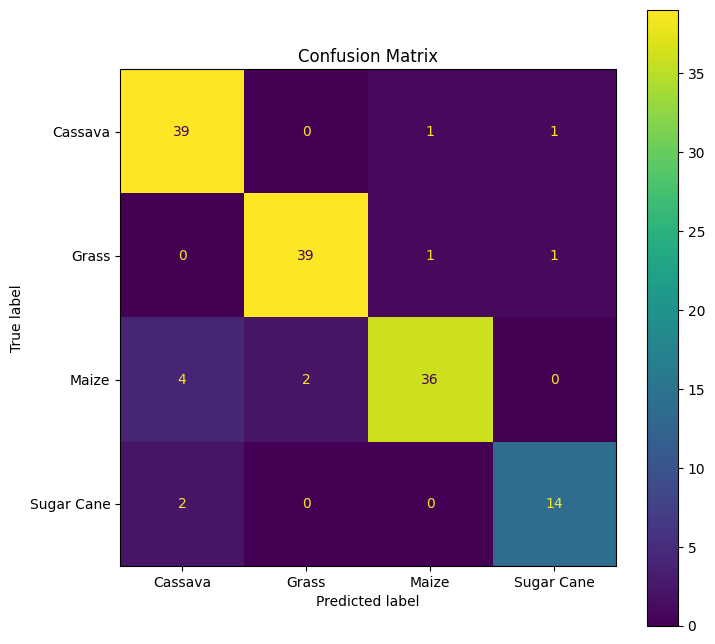

In [18]:
matrix = confusion_matrix(test_itr.classes, pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Cassava', 'Grass', 'Maize', 'Sugar Cane'])

plt.figure(figsize=(8,8))
plt.title(f"Confusion Matrix")
cm_display.plot(ax=plt.subplot())
plt.show()